### Importing Libraries



In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

### Downloading dataset as zip in tmp folder

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-05-19 15:04:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 2607:f8b0:4001:c1d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   123MB/s    in 0.5s    

2020-05-19 15:05:00 (123 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### Extract Zip

In [0]:
import zipfile

location_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(location_zip,'r')         # Reading ZipFiles
zip_ref.extractall(path = '/tmp')
zip_ref.close()                                     # very essential to save what we have just done

### Joins the current directory with the train and validation directory

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### Displaying single image

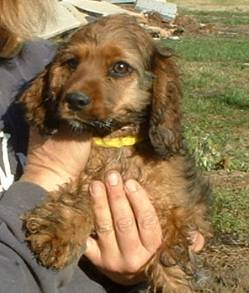

In [7]:
from IPython.display import Image

img_index = 23
img_path = train_dogs_dir + '/' + os.listdir(train_dogs_dir)[img_index] 
Image(img_path)

### Displaying multiple images

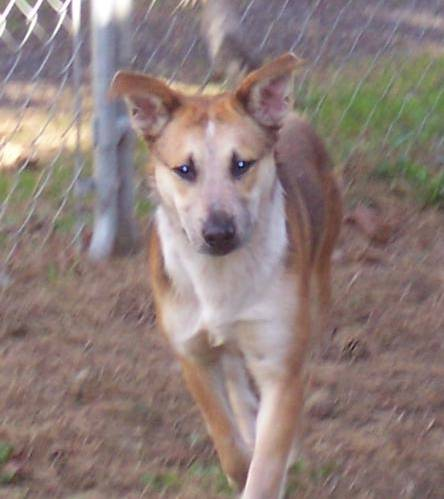

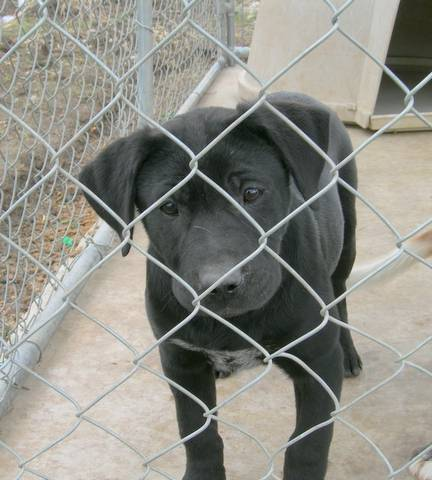

In [8]:
from IPython.display import Image, display

img_index_1 = 50
img_index_2 = 125
img_path_1 = train_dogs_dir + '/' + os.listdir(train_dogs_dir)[img_index_1] 
img_path_2 = train_dogs_dir + '/' + os.listdir(train_dogs_dir)[img_index_2]

display(Image(img_path_1))
display(Image(img_path_2))

### Making image data generator objects

In [60]:
# Making image data generator objects

train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 15,
                  shear_range = 0.1,
                  zoom_range = 0.2,
                  horizontal_flip = True,
                  width_shift_range = 0.1,
                  height_shift_range = 0.1
                )

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150,150),      # try for (150,150)
                  class_mode = 'binary',
                  batch_size = 20               # try for 20
                ) 

validation_datagen = ImageDataGenerator(
                  rescale = 1./255,
                )

validation_generator = validation_datagen.flow_from_directory(
                  validation_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary'
                )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Basic model without optimisations

In [0]:
model_basic = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
        ]
    )

In [48]:
model_basic.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 256)      

### Compiling the model

In [0]:
model_basic.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),metrics=['acc'])

### Fitting the model

In [51]:
history = model_basic.fit(
            train_generator,
            epochs = 20,
            steps_per_epoch = 2000//20,       # steps_per_epoch = total_train_images//batch_size
            validation_data = validation_generator,
            validation_steps =  1000//20,     # validation_steps = total_validation_images//batch_size
            verbose = 1
          )

Epoch 1/20
100/100 [==============================] - 116s 1s/step - loss: 0.6251 - acc: 0.6490 - val_loss: 0.6637 - val_acc: 0.6090
Epoch 2/20
100/100 [==============================] - 116s 1s/step - loss: 0.5711 - acc: 0.7060 - val_loss: 0.5838 - val_acc: 0.6970
Epoch 3/20
100/100 [==============================] - 115s 1s/step - loss: 0.5276 - acc: 0.7465 - val_loss: 0.5677 - val_acc: 0.7040
Epoch 4/20
100/100 [==============================] - 115s 1s/step - loss: 0.5077 - acc: 0.7425 - val_loss: 0.5585 - val_acc: 0.7050
Epoch 5/20
100/100 [==============================] - 115s 1s/step - loss: 0.4751 - acc: 0.7725 - val_loss: 0.5542 - val_acc: 0.7130
Epoch 6/20
100/100 [==============================] - 115s 1s/step - loss: 0.4457 - acc: 0.7905 - val_loss: 0.5413 - val_acc: 0.7400
Epoch 7/20
100/100 [==============================] - 116s 1s/step - loss: 0.4153 - acc: 0.8090 - val_loss: 0.6648 - val_acc: 0.6630
Epoch 8/20
100/100 [==============================] - 116s 1s/step - 

### Visualising the model accuracy

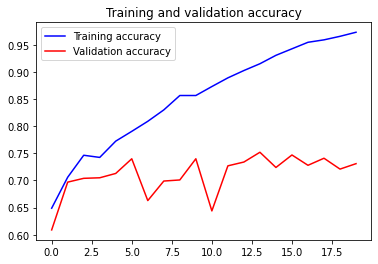

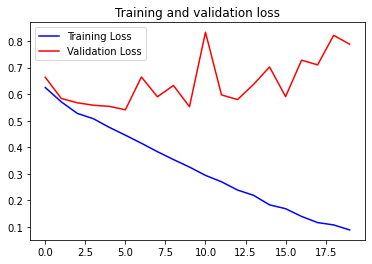

In [52]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Improving the model by optimisations




### Introducing Dropout and Batchnorm layers

In [0]:
model_opt = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1,activation='sigmoid')
        ]
    )

In [55]:
model_opt.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)       

### Compiling the model

In [0]:
model_opt.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])

### Fitting the model

In [63]:
history = model_opt.fit(
            train_generator,
            epochs = 20,
            steps_per_epoch = 2000//10,       # steps_per_epoch = total_train_images//batch_size # taking more steps pre epoch due to less data
            validation_data = validation_generator,
            validation_steps =  1000//10,     # validation_steps = total_validation_images//batch_size
            verbose = 1
          )

Epoch 1/20
200/200 [==============================] - 317s 2s/step - loss: 0.8197 - acc: 0.6028 - val_loss: 0.8453 - val_acc: 0.6130
Epoch 2/20
200/200 [==============================] - 317s 2s/step - loss: 0.6508 - acc: 0.6507 - val_loss: 0.8731 - val_acc: 0.6470
Epoch 3/20
200/200 [==============================] - 317s 2s/step - loss: 0.5768 - acc: 0.7117 - val_loss: 0.6406 - val_acc: 0.6860
Epoch 4/20
200/200 [==============================] - 318s 2s/step - loss: 0.5300 - acc: 0.7400 - val_loss: 0.4737 - val_acc: 0.7765
Epoch 5/20
200/200 [==============================] - 317s 2s/step - loss: 0.4927 - acc: 0.7613 - val_loss: 0.4648 - val_acc: 0.7890
Epoch 6/20
200/200 [==============================] - 319s 2s/step - loss: 0.4749 - acc: 0.7738 - val_loss: 0.5219 - val_acc: 0.7505
Epoch 7/20
200/200 [==============================] - 319s 2s/step - loss: 0.4390 - acc: 0.7977 - val_loss: 0.7526 - val_acc: 0.6915
Epoch 8/20
200/200 [==============================] - 319s 2s/step - 

### Visualising the model accuracy

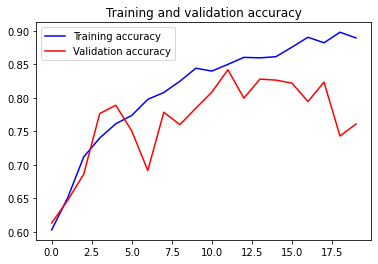

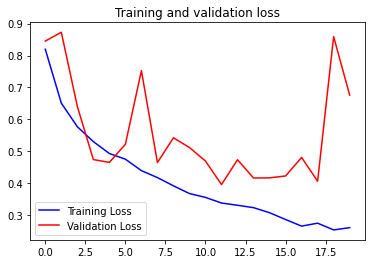

In [64]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Better then our previous model,but lack of data and overfitting not making it a good model overall.